In [16]:
from ultralytics import YOLO

# Load a model
model = YOLO(r"yolo_run\weights\best.onnx")
results = model(r"data\multi-class-knee-osteoporosis-x-ray-dataset\archive\Osteopenia\OP1.JPEG")
results[0].show()


Loading runs\detect\train25\weights\best.onnx for ONNX Runtime inference...
Using ONNX Runtime CUDAExecutionProvider

image 1/1 c:\Users\e0l07sq\Desktop\rnd\osteoporosis_project\data\multi-class-knee-osteoporosis-x-ray-dataset\archive\Osteopenia\OP1.JPEG: 640x640 2 knees, 16.6ms
Speed: 0.0ms preprocess, 16.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


Loading runs\detect\train25\weights\best.onnx for ONNX Runtime inference...
Using ONNX Runtime CUDAExecutionProvider

image 1/1 c:\Users\e0l07sq\Desktop\rnd\osteoporosis_project\data\deleted_images\OS_Collected_Data\Normal\Normal 38.png: 640x640 1 knee, 17.6ms
Speed: 0.0ms preprocess, 17.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\Users\e0l07sq\Desktop\rnd\osteoporosis_project\data\deleted_images\OS_Collected_Data\Normal\Normal 66.png: 640x640 1 knee, 8.9ms
Speed: 2.1ms preprocess, 8.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\Users\e0l07sq\Desktop\rnd\osteoporosis_project\data\deleted_images\OS_Collected_Data\Normal\Normal 377.png: 640x640 1 knee, 9.6ms
Speed: 2.9ms preprocess, 9.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\Users\e0l07sq\Desktop\rnd\osteoporosis_project\data\deleted_images\OS_Collected_Data\Normal\Normal 352.png: 640x640 1 knee, 10.0ms
Speed: 2.9ms prepr

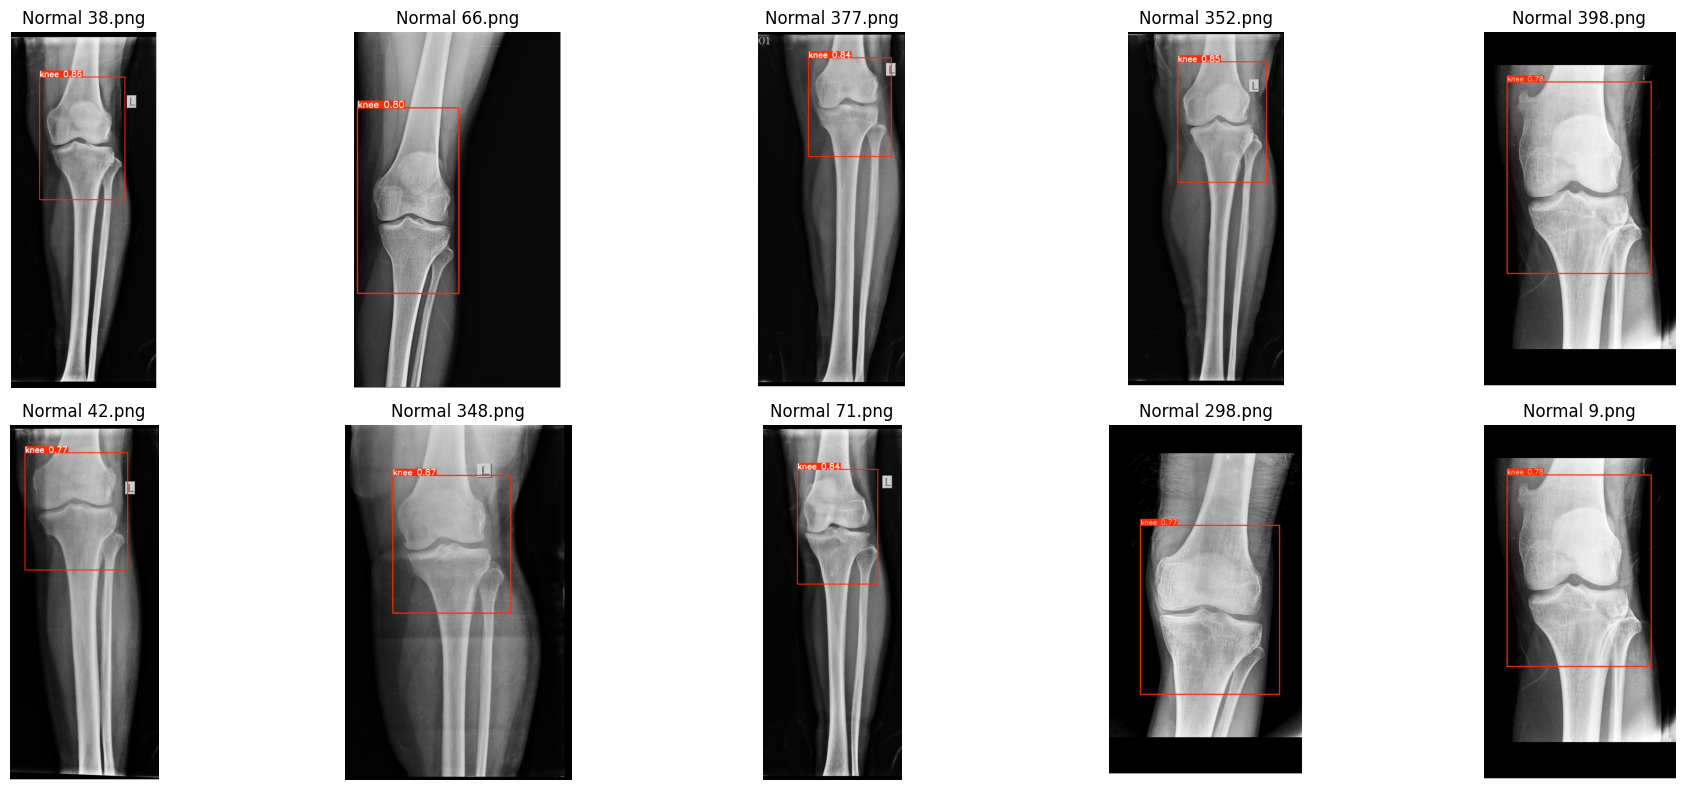

In [23]:
import random
import glob
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO
from PIL import Image

# Load YOLO model
model = YOLO(r"runs\detect\train25\weights\best.onnx")

# Define the folder containing images
image_folder = r"data\deleted_images\OS_Collected_Data\Normal"

# Get all image file paths
image_paths = glob.glob(image_folder + "/*.png")  # Change to "*.jpg" if needed

# Select 10 random images
random_images = random.sample(image_paths, min(10, len(image_paths)))

# Plot predictions in notebook
fig, axes = plt.subplots(2, 5, figsize=(20, 8))  # 2 rows, 5 columns


for ax, image_path in zip(axes.flatten(), random_images):
    results = model(image_path)  # Run YOLO on image
    result_img = results[0].plot()  # Get the annotated image

    ax.imshow(result_img)  # Display the image
    ax.set_title(image_path.split("\\")[-1])  # Show image filename
    ax.axis("off")  # Hide axes

plt.tight_layout()
plt.show()
